# Using Linear Transformations on 3D Objects: Code Examples

This Jupyter notebook contains all of the code examples from the paper. Each one can be run either locally after downloading the file or by using the Binder link listed in the GitHub README file. In order for the demonstration to work properly, each piece of code must be run in order.

First, we import the necessary packages.

In [1]:
# import statements
import demotools as demo
import math
import numpy as np

As mentioned in the paper, all demonstrations will start with a 5 by 5 cube defined by the below matrix.

In [2]:
cube = np.array([[-5, -5, -5, -5, 5, 5, 5, 5],
                 [-5, -5, 5, 5, -5, -5, 5, 5],
                 [-5, 5, -5, 5, -5, 5, -5, 5]])

These notebook examples will use the function `demotools.display_objects` to display the 3D representation of each matrix. The `demotools` package makes use of the `matplotlib` library to plot matrices in 3D space and is employed here in order to reduce code clutter and allow us to focus on the matrix algebra operations taking place. If you are interested in the implementation details, take a look at the `demotools` package found in the GitHub repository. 

We demonstrate by displaying our default cube:

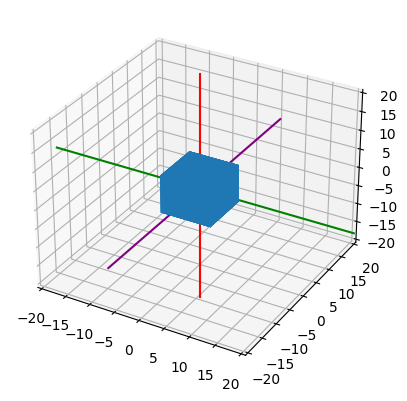

In [3]:
demo.display_objects(cube)

## Section 3: Scaling

In the following code, we perform a simple uniform dilation by
a factor of 2.

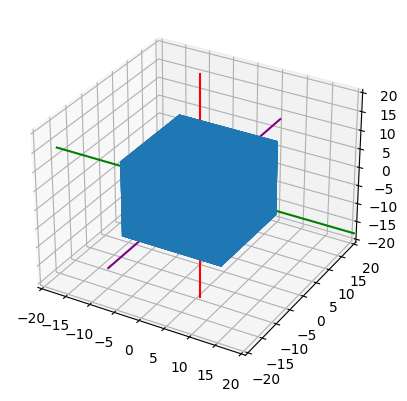

In [4]:
S = np.array([[2, 0, 0],
              [0, 2, 0],
              [0, 0, 2]])
cube2x = np.matmul(S, cube)

demo.display_objects(cube2x)

Next, this code scales the cube non-uniformly by a factor of 0.5 on the x-axis and 3 on the z-axis. The y-axis is unchanged.

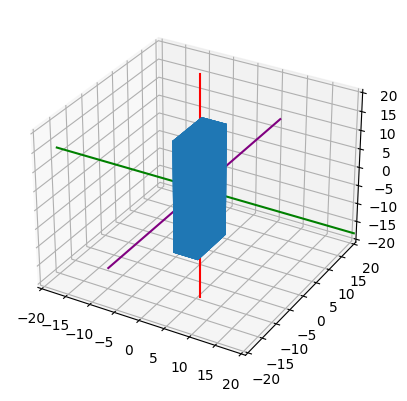

In [5]:
S = np.array([[0.5, 0, 0],
              [0, 1, 0],
              [0, 0, 3]])
cube_stretched = np.matmul(S, cube)

demo.display_objects(cube_stretched)

Lastly, we demonstrate the effects of a negative scale factor using a new `offset_cube` translated 15 units along the x-axis and a scale matrix with a uniform scale factor of -0.5.

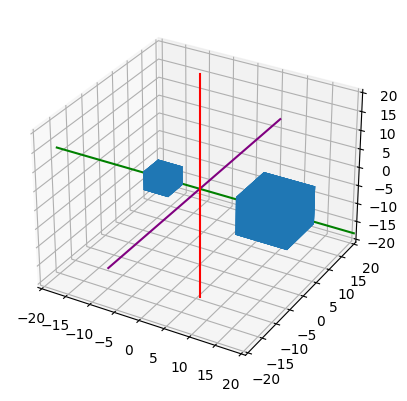

In [6]:
offset_cube = np.array([[10, 10, 10, 10, 20, 20, 20, 20],
                        [-5, -5,  5,  5, -5, -5,  5,  5],
                        [-5,  5, -5,  5, -5,  5, -5,  5]])

S = np.array([[-0.5, 0, 0],
              [0, -0.5, 0],
              [0, 0, -0.5]])
cube_reflected = np.matmul(S, offset_cube)

demo.display_objects(cube_reflected, offset_cube)

As can be seen above, scaling using matrix multiplication is rather simple and intuitive. This is not so much the case with rotation, which is next.

## Section 4: Rotation
For convenience, we use the following function to define our rotation matrices.

In [9]:
# takes a vector c = [cx, cy, cz]^T and returns the rotation array.
def get_rotation_matrix(cx, cy, cz, theta):
    rc11 = math.cos(theta) + math.pow(cx, 2) * (1 - math.cos(theta))
    rc12 = cx * cy * (1 - math.cos(theta)) - cz * math.sin(theta)
    rc13 = cx * cz * (1 - math.cos(theta)) + cy * math.sin(theta)

    rc21 = cy * cx * (1 - math.cos(theta)) + cz * math.sin(theta)
    rc22 = math.cos(theta) + math.pow(cy, 2) * (1 - math.cos(theta))
    rc23 = cy * cz * (1 - math.cos(theta)) - cx * math.sin(theta)
    
    rc31 = cz * cx * (1 - math.cos(theta)) - cy * math.sin(theta)
    rc32 = cz * cy * (1 - math.cos(theta)) + cx * math.sin(theta)
    rc33 = math.cos(theta) + math.pow(cz, 2) * (1 - math.cos(theta))

    return np.array([[rc11, rc12, rc13],
                     [rc21, rc22, rc23],
                     [rc31, rc32, rc33]])

This function takes a cx, cy, cz to define an axis of rotation and an angle theta and returns a rotation matrix.

We start by rotating our standard cube 45 degrees around axis defined by the vector (1, 1, 1).

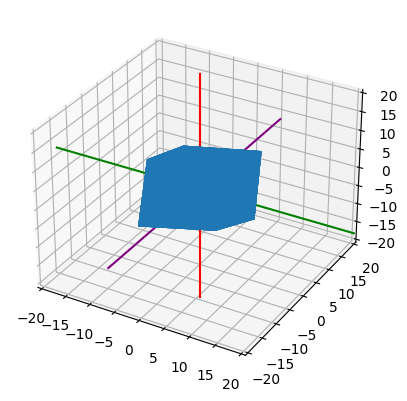

In [10]:
theta = math.pi / 4

R = get_rotation_matrix(1, 1, 1, theta)
cube_rotated = np.matmul(R, cube)

demo.display_objects(cube_rotated)

We can see immediately that the cube has, in fact, been rotated. However, there is a problem; it has also been stretched. The details of why this occurred (and how to fix it) are discussed in the paper. 

In reading the paper we find that the solution simply involves obtaining the unit vector corresponding to our axis of rotation. This is done below, giving us the result we are looking for.

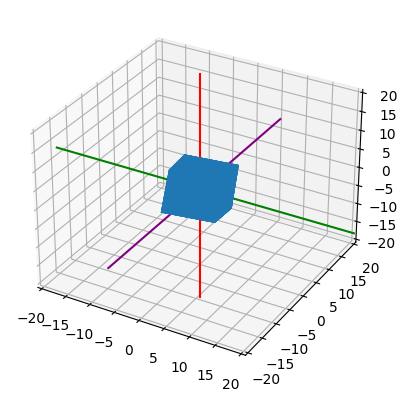

In [11]:
cx = cy = cz = 1 / math.sqrt(3)

R = get_rotation_matrix(cx, cy, cz, theta)
cube_rotated_properly = np.matmul(R, cube)

demo.display_objects(cube_rotated_properly)

An orbiting effect can be achieved by rotation an object offset from the origin about a standard axis. 

The code below does this using the z-axis and a new `orbit_cube` shifted 15 units along the x-axis.

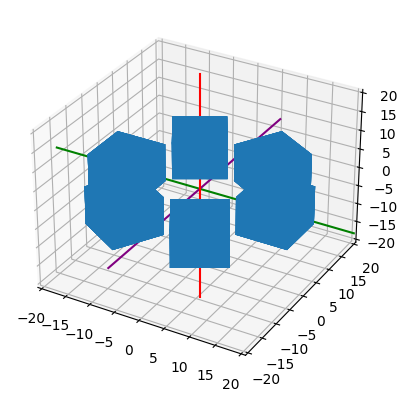

In [14]:
orbit_cube = np.array([[10, 10, 10, 10, 20, 20, 20, 20],
                      [-5, -5,  5,  5, -5, -5,  5,  5],
                      [-5,  5, -5,  5, -5,  5, -5,  5]])
theta = math.pi / 3

R = get_rotation_matrix(0, 0, 1, theta)

cubes = [orbit_cube]
for i in range(1, 6):
    cubes.append(np.matmul(R, cubes[i - 1]))
                 
demo.display_objects(cubes[0], cubes[1], cubes[2], cubes[3], cubes[4], cubes[5])

Now we will demonstrate how adjusting the magnitude of the rotation vector will scale the cubes in addition to adjust their distance from the origin.
In this case the cubes are shrunk and they are being pulled closer toward the origin.

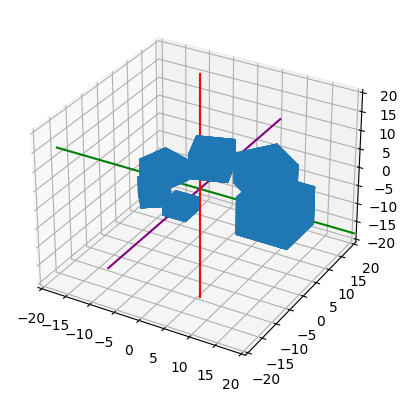

In [18]:
R = get_rotation_matrix(0, 0, 0.8, theta)

cubes = [orbit_cube]
for i in range(1, 6):
    cubes.append(np.matmul(R, cubes[i - 1]))
                 
demo.display_objects(cubes[0], cubes[1], cubes[2], cubes[3], cubes[4], cubes[5])

The exact nature of the behavior of the transformation with a magnitude not equal to 1 is tricky. The best way to work is most likely to 

## Section 5: Shear
All code in this section will use a shear factor of 1.
The below code performs a shear on the default cube in z with respect to y.

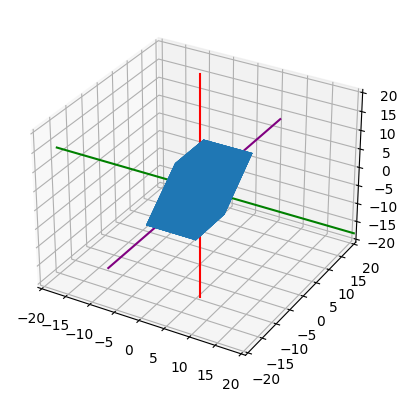

In [19]:
S = np.array([[1, 0, 0],
              [0, 1, 1],
              [0, 0, 1]])
cube_sheared = np.matmul(S, cube)

demo.display_objects(cube_sheared)

Below is an example of a shear in y, with respect to z.

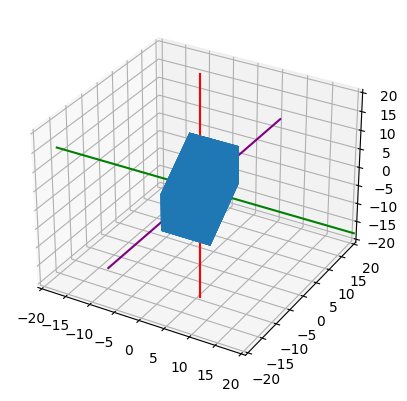

In [20]:
S = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 1, 1]])
cube_sheared = np.matmul(S, cube)

demo.display_objects(cube_sheared)

Below, it is shown that you can squeeze two shears into the same operator. Below is the standard cube sheared in z with respect to x and y

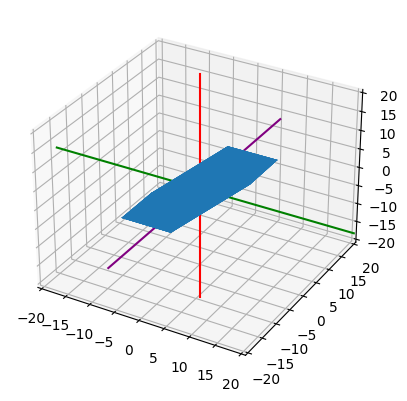

In [21]:
S = np.array([[1, 0, 1],
              [0, 1, 1],
              [0, 0, 1]])
cube_sheared = np.matmul(S, cube)

demo.display_objects(cube_sheared)